<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [ ]:
%run ./multitask_style_learning_utils.ipynb

In [ ]:
selected_tasks = ['ShortHumor']

training_args = TrainingArgs(selected_tasks=selected_tasks,
                             base_model_name='bert-base-uncased',
                             freeze_bert=False,
                             use_pooler=False,
                             num_epoch=5,
                             data_limit=30000,
                            )

In [ ]:
training_args.model_folder = f'{result_folder}/ShortHumor/20220913-12:28:19'

In [ ]:
training_args

TrainingArgs(selected_tasks=['ShortHumor'], base_model_name='bert-base-uncased', freeze_bert=False, use_pooler=False, num_epoch=5, lr=5e-05, model_folder='/scratch/data_jz17d/result/ShortHumor/20220913-12:28:19', model_name=None, batch_size=32, max_length=64, shuffle=False, num_workers=4, data_limit=30000, save_best=True, load_best_at_end=True)

In [ ]:
model = init_model(training_args)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
model = load_best_model(model, training_args.model_folder)

In [ ]:
eval_dataloader = MultiTaskTestDataLoader(training_args, split='dev')

Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

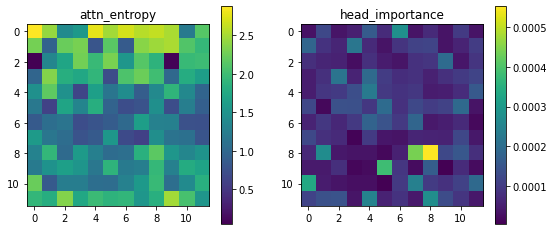

In [ ]:
attn_entropy, head_importance, preds, labels, entropy_per_step, importance_per_step = compute_heads_importance(model, eval_dataloader, training_args, diagnose_per_step=True)


<matplotlib.colorbar.Colorbar>

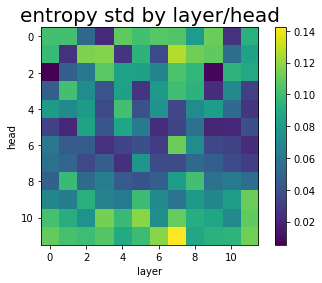

In [ ]:
plt.title('entropy std by layer/head', fontsize=20)
plt.imshow(entropy_per_step.std(axis=0))
plt.xlabel('layer')
plt.ylabel('head')
plt.colorbar()

<matplotlib.colorbar.Colorbar>

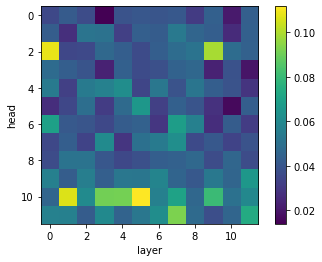

In [ ]:
# plt.title('entropy std by layer/head', fontsize=20)
plt.imshow(entropy_per_step.std(axis=0)/attn_entropy.cpu().numpy())
plt.xlabel('layer')
plt.ylabel('head')
plt.colorbar()

Text(0.5, 0, 'step')

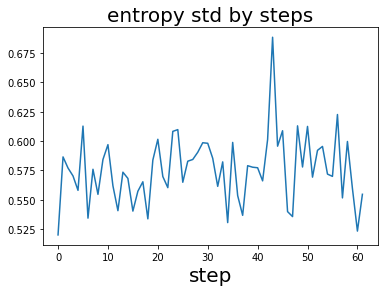

In [ ]:
plt.title('entropy std by steps', fontsize=20)
plt.plot(entropy_per_step.std(axis=(1,2)))
plt.xlabel('step', fontsize=20)

<matplotlib.colorbar.Colorbar>

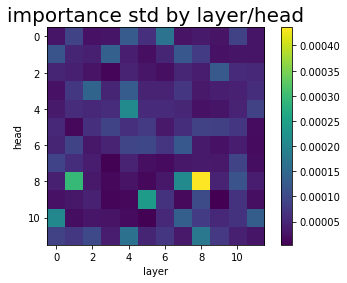

In [ ]:
plt.title('importance std by layer/head', fontsize=20)
plt.imshow(importance_per_step.std(axis=0))
plt.xlabel('layer')
plt.ylabel('head')
plt.colorbar()

Text(0.5, 0, 'step')

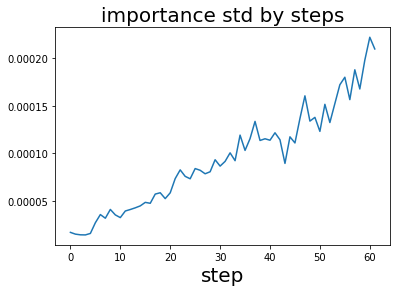

In [ ]:
plt.title('importance std by steps', fontsize=20)
plt.plot(importance_per_step.std(axis=(1,2)))
plt.xlabel('step', fontsize=20)

Iteration:   0%|          | 0/62 [00:00<?, ?it/s]

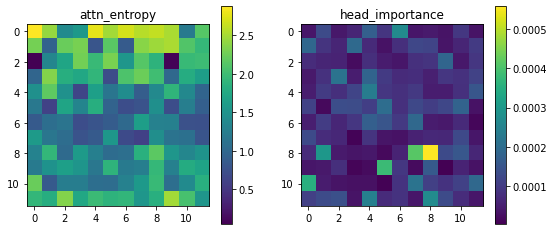

In [ ]:
attn_entropy, head_importance, preds, labels, entropy_per_step, importance_per_step = compute_heads_importance(model, eval_dataloader, training_args, diagnose_per_step=True, diagnose_normalize=False)


<matplotlib.colorbar.Colorbar>

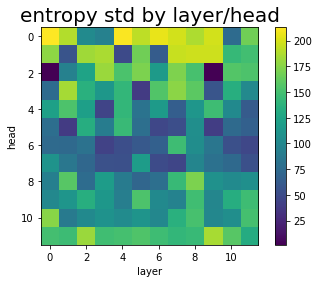

In [ ]:
plt.title('entropy std by layer/head', fontsize=20)
plt.imshow(entropy_per_step.std(axis=0))
plt.xlabel('layer')
plt.ylabel('head')
plt.colorbar()

Text(0.5, 0, 'step')

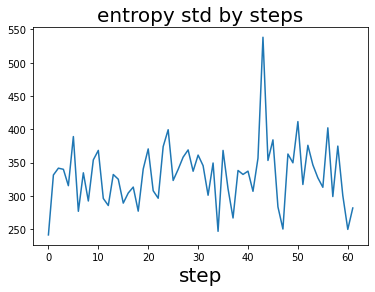

In [ ]:
plt.title('entropy std by steps', fontsize=20)
plt.plot(entropy_per_step.std(axis=(1,2)))
plt.xlabel('step', fontsize=20)

<matplotlib.colorbar.Colorbar>

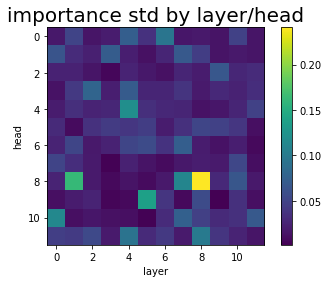

In [ ]:
plt.title('importance std by layer/head', fontsize=20)
plt.imshow(importance_per_step.std(axis=0))
plt.xlabel('layer')
plt.ylabel('head')
plt.colorbar()

Text(0.5, 0, 'step')

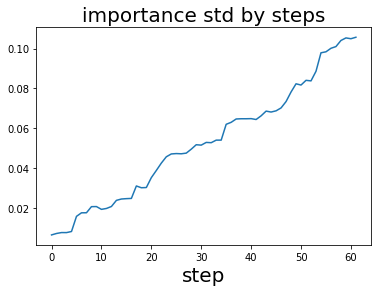

In [ ]:
plt.title('importance std by steps', fontsize=20)
plt.plot(importance_per_step.std(axis=(1,2)))
plt.xlabel('step', fontsize=20)